In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. Load Datasets [cite: 21, 22, 40]
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')
credit_df = pd.read_csv('../data/raw/creditcard.csv')

In [3]:
# 2. Data Cleaning & Type Correction [cite: 97-100]
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df.drop_duplicates(inplace=True)
credit_df.drop_duplicates(inplace=True)

In [4]:
# 3. Geolocation Mapping (E-commerce only) [cite: 105-107]
def map_ip_to_country(ip):
    # Matches IP to country based on lower/upper bound range 
    match = ip_df[(ip >= ip_df['lower_bound_ip_address']) & 
                  (ip <= ip_df['upper_bound_ip_address'])]
    return match['country'].values[0] if not match.empty else 'Unknown'

In [5]:
# Applying mapping (Note: for large datasets, consider vectorization)
fraud_df['country'] = fraud_df['ip_address'].apply(map_ip_to_country)

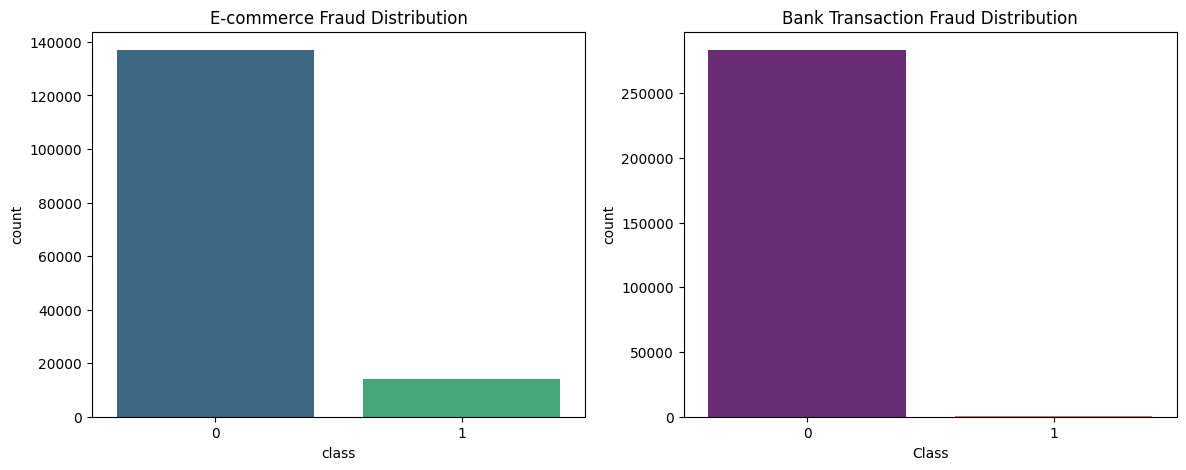

In [6]:
# 4. Class Distribution Analysis [cite: 34, 46, 104]
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# E-commerce Imbalance: Drawing on the first frame (ax[0])
sns.countplot(x='class', data=fraud_df, ax=ax[0], hue='class', palette='viridis', legend=False)
ax[0].set_title('E-commerce Fraud Distribution')

# Bank Imbalance: Drawing on the second frame (ax[1]) [cite: 46]
sns.countplot(x='Class', data=credit_df, ax=ax[1], hue='Class', palette='magma', legend=False)
ax[1].set_title('Bank Transaction Fraud Distribution')

plt.show()

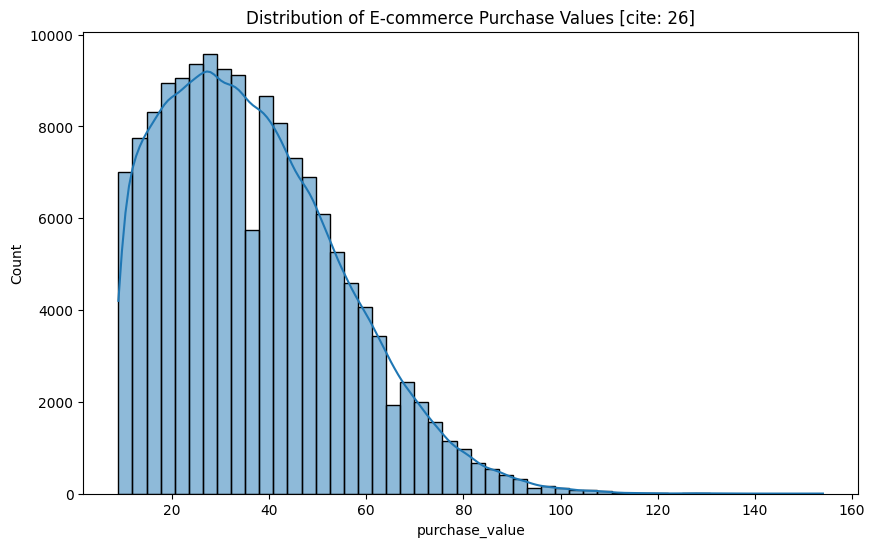

In [7]:
# 5. Univariate Analysis [cite: 102]
# Checking distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title('Distribution of E-commerce Purchase Values [cite: 26]')
plt.show()

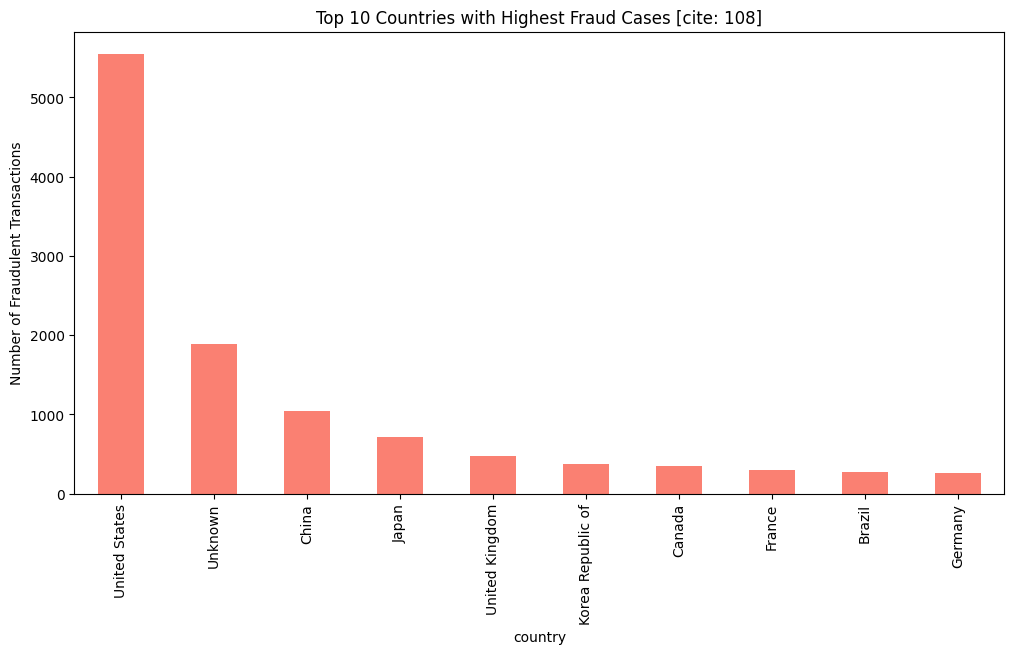

In [8]:
# 6. Bivariate Analysis: Fraud by Country [cite: 103, 108]
fraud_by_country = fraud_df[fraud_df['class'] == 1]['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
fraud_by_country.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries with Highest Fraud Cases [cite: 108]')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

In [9]:
fraud_df.to_csv('../data/processed/fraud_data_with_country.csv', index=False)